# Import

In [21]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

import starmaptools.classes as smt

In [22]:
plotly_toggle = False      # True for plotly graphs, False for native pandas

# Exploration

## Overview

In [25]:
systems_count = smt.SQLQuery(query="SELECT COUNT(*)").iloc[0,0]
print("There is a total of {s:,} systems.".format(s=systems_count))

There is a total of 30,492,549 systems.


In [4]:
null_values = smt.SQLQuery(query="SELECT COUNT(*)", filter="`value` IS NULL").iloc[0,0]
no_values = smt.SQLQuery(query="SELECT COUNT(*)", filter="`value` = 1").iloc[0,0]
with_value = smt.SQLQuery(query="SELECT COUNT(*)", filter="`value` > 1").iloc[0,0]

data = pd.DataFrame(
    {'count':[null_values, no_values, with_value]},
    index=['Null', 'Unknown', 'Valued']
)
data

,count
Null,28492201
Unknown,1888967
Valued,111381


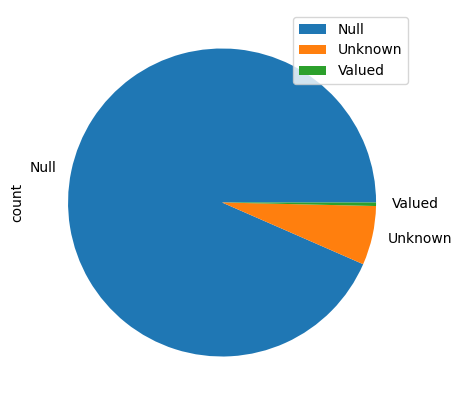

In [5]:
if plotly_toggle is False:
    data.plot.pie(y='count', figsize=(5, 5))
else:
    fig = px.pie(data, values='count', names=data.index)
    fig.show()

# Valued Systems

In [6]:
# Load all systems with value
valued_systems = smt.ValuedSystems()

In [7]:
min_val = valued_systems.loc[valued_systems['value'] == valued_systems['value'].min(), 'value'].min()
print('Minimum system value is {:,} CR'.format(min_val))

Minimum system value is 2,880 CR


In [8]:
max_val = valued_systems.loc[valued_systems['value'] == valued_systems['value'].max(), 'value'].max()
print('Maximum system value is {:,} CR'.format(max_val))

Maximum system value is 334,814,155 CR


In [9]:
valued_systems.describe()

,id,edsm_id,date,coordX,coordY,coordZ,value
count,1.113810e+05,1.113810e+05,111381,111381.000000,111381.000000,111381.000000,1.113810e+05
mean,5.485588e+06,4.623986e+06,2018-12-18 18:28:25.746267136,90.654396,-47.801991,2711.774246,1.309316e+05
min,8.000000e+00,3.000000e+00,2018-12-11 10:39:04,-42213.800000,-2901.060000,-16414.900000,2.880000e+03
25%,1.194987e+06,4.223720e+05,2018-12-11 12:10:40,-489.406000,-81.656200,-208.625000,2.907000e+03
50%,3.083306e+06,3.282709e+06,2018-12-12 10:57:18,-6.593750,-21.218800,55.187500,8.670000e+03
75%,6.108283e+06,4.811673e+06,2018-12-23 01:40:41,154.750000,45.406200,361.906000,7.080900e+04
max,3.049255e+07,3.190159e+07,2019-01-13 22:04:30,40275.100000,2763.560000,65579.800000,3.348142e+08
std,7.180467e+06,6.068494e+06,NaN,5925.944942,233.969123,10541.087846,1.054770e+06


## Distribution of values

In [10]:
bins = ['0-10k','10k-50k','50k-100k','100k-250k', '250k-500k', '500k-1M', '1M+']
caps = [0, 10e+3, 50e+3, 100e+3, 250e+3, 500e+3, 1e+6]
values = []
bin1 = valued_systems.loc[valued_systems.value.between(0, 10e+03, inclusive='left'), 'value']

for i in range(len(caps)-1):
    values.append(valued_systems.loc[valued_systems.value.between(caps[i], caps[i+1], inclusive='left'), 'value'].count())
    # valued_systems[valued_systems.value.between(caps[i], caps[i+1], inclusive='left')]['value_range'] == bins[i]
values.append(valued_systems.loc[valued_systems.value > max(caps), 'value'].count())

hist = pd.DataFrame({'Values':bins, 'Number of systems':values})

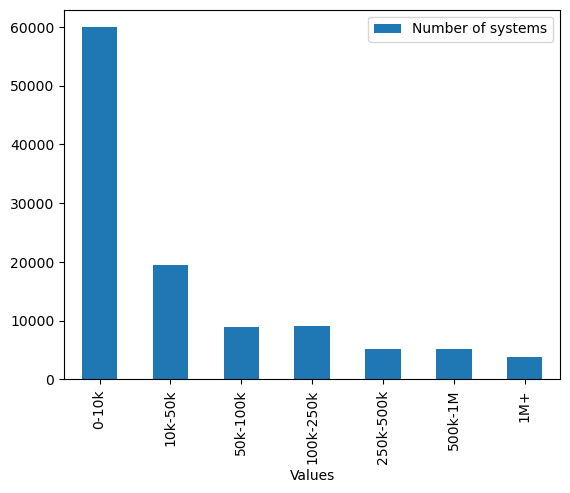

In [11]:
if plotly_toggle is False:
    hist.plot.bar(x='Values', y='Number of systems')
else:
    fig = px.bar(hist, x='Values',y='Number of systems', title="Distribution of values", text_auto='.2s')
    fig.show()

# Galaxy

## Galactic range

In [12]:
max_X, min_X = smt.SQLQuery(query="SELECT MAX(`coordX`), MIN(`coordX`)").transpose().to_numpy().flatten()

max_Y, min_Y = smt.SQLQuery(query="SELECT MAX(`coordY`), MIN(`coordY`)").transpose().to_numpy().flatten()

max_Z, min_Z = smt.SQLQuery(query="SELECT MAX(`coordZ`), MIN(`coordZ`)").transpose().to_numpy().flatten()

gal_range_X = [min_X, max_X]
gal_range_Y = [min_Y, max_Y]
gal_range_Z = [min_Z, max_Z]

In [13]:
print("range X : {min} - {max}\n".format(min=min_X,max=max_X))
print("range Y : {min} - {max}\n".format(min=min_Y,max=max_Y))
print("range Z : {min} - {max}\n".format(min=min_Z,max=max_Z))

range X : -42213.8 - 40503.8

range Y : -29360.5 - 39518.3

range Z : -23405.0 - 65630.2



## Valued Systems Range

In [14]:
max_X = valued_systems['coordX'].max()
min_X = valued_systems['coordX'].min()

max_Y = valued_systems['coordY'].max()
min_Y = valued_systems['coordY'].min()

max_Z = valued_systems['coordZ'].max()
min_Z = valued_systems['coordZ'].min()

range_X = [min_X, max_X]
range_Y = [min_Y, max_Y]
range_Z = [min_Z, max_Z]

In [15]:
print("range X : {min} - {max}\n".format(min=min_X,max=max_X))
print("range Y : {min} - {max}\n".format(min=min_Y,max=max_Y))
print("range Z : {min} - {max}\n".format(min=min_Z,max=max_Z))

range X : -42213.8 - 40275.1

range Y : -2901.06 - 2763.56

range Z : -16414.9 - 65579.8



## Plots

In [16]:
plotly_toggle = False

###  Galaxy

In [17]:
x, y, z =smt.SQLQuery(query="SELECT `coordX`,`coordY`, `coordZ`", filter="`value` >= 1").transpose().values.tolist()


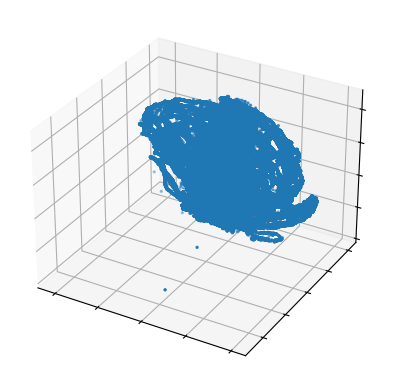

In [18]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(x, y, z,s=2)

ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])

plt.show()

### Valued Systems

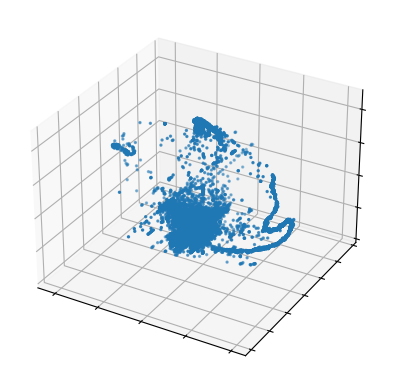

In [19]:
if plotly_toggle is False:
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    ax.scatter(valued_systems['coordX'], valued_systems['coordY'], valued_systems['coordZ'],s=2)

    ax.set(xticklabels=[],
        yticklabels=[],
        zticklabels=[])

    plt.show()
else:
    fig = go.Figure(data=[go.Scatter3d(
        x=valued_systems['coordX'],
        y=valued_systems['coordY'],
        z=valued_systems['coordZ'],
        mode='markers',
        marker=dict(
            size=3,
            color=valued_systems['value'],                # set color to an array/list of desired values
            opacity=0.5
        )
    )])

    fig.show()